#Quiz #6

This notebook is created by Chinchuthakun Worameth as a part of Complex Network (ART.T462) at Tokyo Institute of Technology taught in Fall semester 2021 by Prof. Murata Tsuyoshi. It contains

* A program of computing degree assortativity of Karate club network
* Further analyses on modularity

In [1]:
!pip uninstall networkx
!pip uninstall python-louvain
!pip uninstall community
!pip install python-louvain
!pip install networkx

Found existing installation: networkx 2.6.3
Uninstalling networkx-2.6.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/networkx-2.6.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.6.3/LICENSE.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.6.3/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.6.3/examples/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/plot_beam_search.py
    /usr/local/share/doc/networkx-2.6.3/examples/algorithms/plot_betweenness_centrality.py
    /usr/local/share/doc/networkx-2.6.3/ex

## Problem #1

First, we load the Karate club network and calculate its degree assortivity coefficient by using built-in functions in `networkx`.

Let $\mathbf{G} = (\mathbf{V},\mathbf{E})$ and $\mathbf{A}$ be an undirected graph and an adjacency matrix associated with $\mathbf{G}$, respectively. Suppose that node $i$ has a feature $c_i$, the degree assortivity coefficient of $\mathbf{G}$ is defined as:

\begin{equation}
r = \frac{\sum_{ij}(A_{ij} - k_i k_j / 2m)k_i k_j}{\sum_{ij}(k_i \delta_{ij} - k_i k_j / 2m)k_i k_j}
\end{equation}

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
# https://python-louvain.readthedocs.io/en/latest/
# !pip install python-louvain # for installing python-louvain
from community import community_louvain
import community

Degree assortivity coefficient = -0.47561309768461413


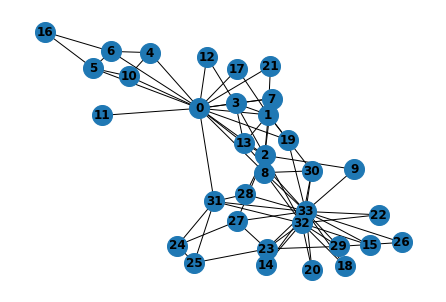

In [2]:
G = nx.karate_club_graph()
nx.draw_spring(G, node_size=400, with_labels=True, font_weight='bold')
print(f"Degree assortivity coefficient = {nx.degree_assortativity_coefficient(G)}")

## Problem #2

Consider the formula for modularity

\begin{equation}
Q = \frac{1}{2m} \sum_{ij} \Bigg(A_{ij} - \frac{k_ik_j}{2m} \delta(c_i,c_j) \Bigg)
\end{equation}

* We can see that the formula requires the knowledge of certain properties of a graph of interest. Specifically, its number of edges ($m$), adjacency matrix ($\mathbf{A}$), degree of each node ($k$), and feature (or class) of each node ($c$).
* As the name suggests, the formula only gives a single real number $Q$, known as modularity, as its output. It is a measure how strongly a graph can be divided into clusters. If the value of a graph is high, that graph has many edges between nodes in the same cluster (more than the expected number) while has few inter-cluster connections. Therefore, we can solve clustering problem of a network by maximizing its modularity. Note that the modularity ranges from -1 to 1.

## Problem #3

If all nodes in a graph belong to the same group, i.e. $\delta(c_i,c_j)=1, \forall (i,j)$, we can derive its modularity as

\begin{equation}
\begin{aligned}
Q &= \frac{1}{2m} \sum_{ij} \Bigg(A_{ij} - \frac{k_ik_j}{2m} \delta(c_i,c_j) \Bigg) \\
&= \frac{1}{2m} \Bigg(2m - \frac{4m^2}{2m} \Bigg) \\
&= 0
\end{aligned}
\end{equation}

Note that $\sum_{ij} A_{ij} = 2m$ and $\sum_{ij} k_ik_j = \sum_i k_i  \sum_j k_j = \sum_i k_im = m^2$.

We can verify our calculation by setting all nodes in the Karate club network to the same cluster and try calculating modularity.

In [3]:
G = nx.karate_club_graph()
cluster = dict((i,1) for i in range(nx.number_of_nodes(G)))
print("modularity:", community.modularity(cluster, G))

modularity: 0.0


## Problem #4



Before taking a look at the Karate club network when modularity value is negative, let us calculate the modularity of its normal version first. Since we know that its modularity is positive, we can create the situation when the modularity is negative as follows:
1. Construct the complement of graph $\mathbf{G}$, which will be referred as $\mathbf{G}'$ herein.
2. Cluster $\mathbf{G}'$ by maximizing its modularity. Then, store the obtained partition (class for each node)
3. Assign that partition to nodes in the original graph $\mathbf{G}$.

In [4]:
def report_modularity(G, membership, dict, color_map, msg=""):
  print("==============================")
  print(msg)
  print("membership:", membership)
  print(dict)
  print("modularity:", community.modularity(dict, G))
  print(color_map)

real partition
membership: [[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]]
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}
modularity: 0.3582347140039447
['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'red', 'red', 'yellow', 'red', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow']
partition based on modularity (positive)
membership: [[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [23, 24, 25, 27, 28, 31], [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33]]
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 3, 9: 3, 10: 1, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 1

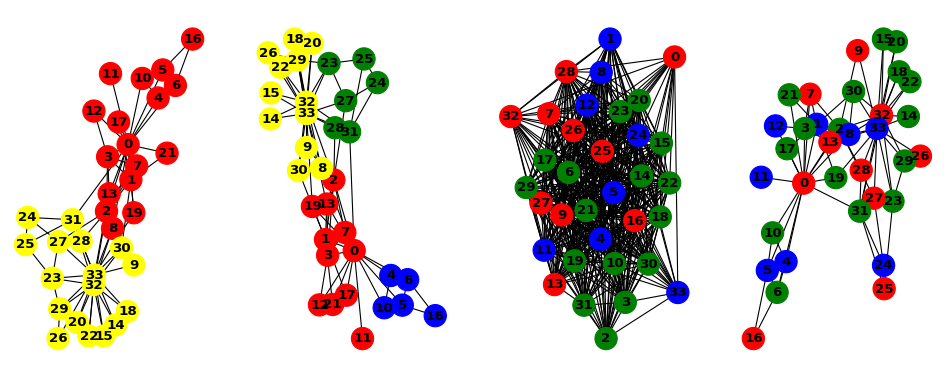

In [5]:
G = nx.karate_club_graph()
color_map = ['red'] * nx.number_of_nodes(G)
membership = [[], []]
dict = {}

# real partition
for i in range(nx.number_of_nodes(G)) :
  if G.nodes[i]['club'] == 'Officer' :
    color_map[i] = 'yellow'
    membership[0].append(i)
    dict[i] = 0
  else :
    membership[1].append(i)
    dict[i] = 1
report_modularity(G, membership, dict, color_map, msg="real partition")

# partition of G based on modularity
colors = ['red', 'blue', 'green', 'yellow', 'black']

partition = community_louvain.best_partition(G)
m = max(partition.values()) + 1
membership_b  = [[] * m for i in range(m)]

for k, v in partition.items() :
  membership_b[v].append(k)

color_map_b = [colors[partition[i]] for i in range(nx.number_of_nodes(G))]
report_modularity(G, membership_b, partition, color_map_b, msg="partition based on modularity (positive)")

# partition of G complement
G_complement = nx.complement(G)
partition = community_louvain.best_partition(G_complement)
m = max(partition.values()) + 1
membership_r  = [[] * m for i in range(m)]

for k, v in partition.items() :
  membership_r[v].append(k)

color_map_r = [colors[partition[i]] for i in range(nx.number_of_nodes(G_complement))]
report_modularity(G_complement, membership_r, partition, color_map_r, msg="partition based on modularity (complement graph)")

# apply partition of G complement to G
report_modularity(G, membership_r, partition, color_map_r, msg="partition based on modularity (negative)")

# visualization
plt.figure(figsize=(15, 6), dpi=80)
plt.subplot(141)
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')
plt.subplot(142)
nx.draw_spring(G, node_size=400, node_color=color_map_b, with_labels=True, font_weight='bold')
plt.subplot(143)
nx.draw_spring(G_complement, node_size=400, node_color=color_map_r, with_labels=True, font_weight='bold')
plt.subplot(144)
nx.draw_spring(G, node_size=400, node_color=color_map_r, with_labels=True, font_weight='bold')